<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/A5-univariate-rnn-forecasting/univariate_time_series_1_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [10]:
np.random.seed(42)

n_steps = 50
series = load('/content/drive/MyDrive/Colab Notebooks/CS581-TestResults/assignment5/HW5-supp-files/univariate-time-series-1-step.npy')

X_train, y_train = series[:7000, :n_steps], series[:7000, -1] # -1 references the last column
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]


In [11]:
series.shape

(10000, 51, 1)

In [12]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

Saving figure time_series_plot


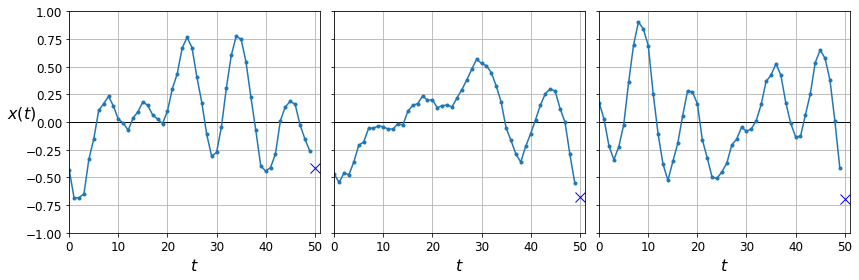

In [13]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

Linear predictions:

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

#Replace this with your RNN code

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1147 - val_loss: 0.0487
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.0253
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.0184
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0154
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0132
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0117
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0090
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0079
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0072

In [15]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0039


0.003911957144737244

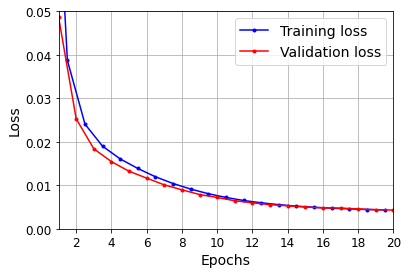

In [16]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

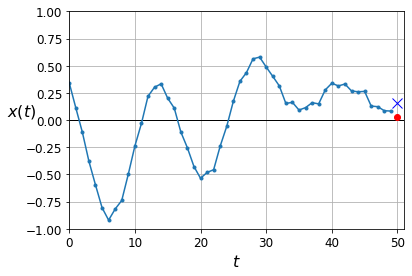

In [17]:
y_pred = model.predict(X_test)
plot_series(X_test[15, :, 0], y_test[15, 0], y_pred[15, 0])
plt.show()

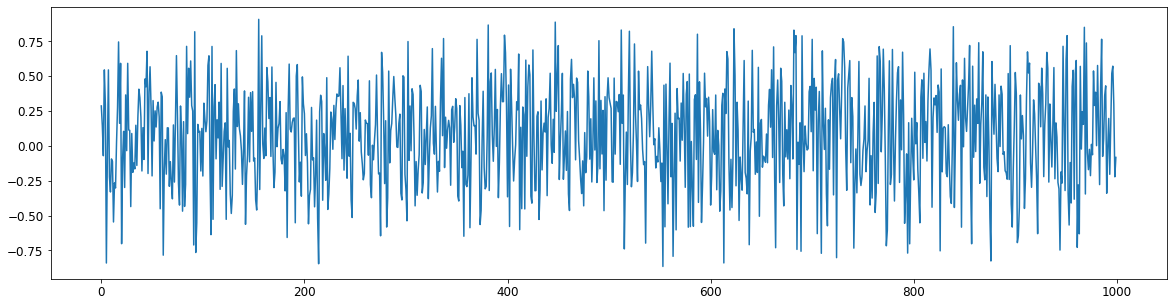

In [18]:
plt.figure(figsize=(20,5))
plt.plot(y_pred)

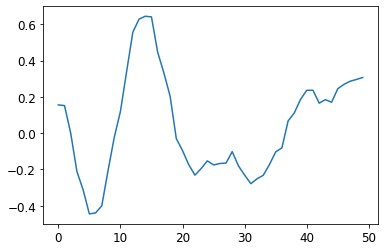

In [19]:
# plt.plot(X_test[:,:,0])
plt.plot(X_test[0])

## RNN model

In [20]:
X_train.shape

(7000, 50, 1)

$X_{train}$ contains 7000 time series each of 50 steps. 

In [21]:
y_train.shape

(7000, 1)

$Y_{train}$ contains the 51st timestep value for all the time series in $X_{train}$

In [43]:
rnnmodel = keras.models.Sequential([
    keras.layers.LSTM(256,input_shape=[50,1]),
    keras.layers.Dense(1)
])
rnnmodel.compile(loss="mse", optimizer="adam")
print(rnnmodel.summary())

# history = model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
rnnmodel.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=20, batch_size=128)

Epoch 1/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0722 - val_loss: 0.0279
Epoch 2/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0187 - val_loss: 0.0093
Epoch 3/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 4/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 11/20
55/55 

In [45]:
scores = rnnmodel.evaluate(X_test,y_test)
print(f"RMSE: {scores*100}")

32/32 [==============================] - 0s 3ms/step - loss: 0.0029
RMSE: 0.2874556463211775


In [ ]:
scores